In [190]:
def GeneratorCity(nb_city: int = 10, size_map: tuple = (100, 100), display: bool = False) -> list:
    """
    Return a list of cities with random coordinates and their utility

    Arguments:
        nb_city: Number of cities
        size_map: Area of the map in this format : (max_abscissa, max_ordinate)
        display: Draw a diagram of the situation

    Return:
        An array of cities with the abscissa, ordinate and the use of each cities ;
        0 means "This city is not important" ;
        1 means "This city must be delivered" ;
        2 means "This city is the depository" ;
    """
    abscissa = random.sample(range(0, size_map[0]), nb_city)
    ordinate = random.sample(range(0, size_map[1]), nb_city)
    delivered = random.choices(population=[0, 1], k=nb_city)

    delivered[random.randint(1, nb_city) - 1] = 2

    if display:
        fig, ax = plt.subplots()
        

        for i in range(nb_city):   
            ax.scatter(abscissa[i],ordinate[i], c= "red" if delivered[i] == 0 else "green" if delivered[i] == 1 else "blue")
            ax.annotate(str(i+1), (abscissa[i], ordinate[i]))

    return [[abscissa[i],ordinate[i],delivered[i]] for i in range(nb_city)]


In [191]:
def GeneratorGraph(cities: list, fluctuation: int = 10, fluctuation_weight: int = 10):
    """
    Return the graph of the instance

    Arguments:
        cities: The coordinate from the city in this format : [max_abscissa, max_ordinate]
        fluctuation: The rate of fluctuation of the cost of the arcs
        fluctuation_weight: The fluctuation amplitude of the cost of the arcs

    Return:
        A matrix of size [nb_city, nb_city, 3]
    """

    # Initialization of the graph matrix
    generator = np.array([[(0, 0, 0)] * len(cities)] * len(cities))

    # For each element of the graph
    for i in range(len(cities)):
        for j in range(len(cities)):
            if i != j:
                # Traffic randomization
                arc_fluctuation = random.randrange(1, fluctuation)
                # Randomization of the traffic amplitude
                arc_fluctuation_weight = random.randrange(1, fluctuation_weight)
                # 
                arc_min_cost = sqrt(pow(cities[i][0] - cities[j][0], 2) + pow(cities[i][1] - cities[j][1], 2))

                generator[i][j] = (arc_fluctuation, arc_fluctuation_weight, arc_min_cost)

    return generator


In [192]:
def DisplayGeneratorGraph(graph: np.array([[()]])):
    """
    Print the graph

    Arguments:
        graph: The graph
    """
    
    # For each line
    for i in range(np.shape(graph)[0]):
        # Begin with the check mark character
        print("[", end="")

        # For each column
        for j in range(np.shape(graph)[1]- 1):
            # Print the value and add a comma
            print(graph[i][j], end=", ")

        # Print the last value of the line and close it
        print(str(graph[i][j+1]) + "],")

AttributeError: 'NoneType' object has no attribute 'legendHandles'

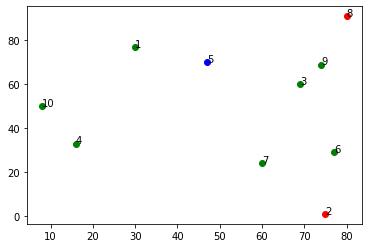

In [193]:
import numpy as np
import random
import matplotlib.pyplot as plt
from math import *

# Generator settings
Nb_Cities = 10
Size_Map = (100, 100)
Fluctuation = 10
Fluctuation_Weight = 10
Display = True

# Seed of generation
random.seed(a=3)

# Generation of cities
Cities = GeneratorCity(Nb_Cities, Size_Map, Display)

# Generation of the graph
DisplayGeneratorGraph(GeneratorGraph(Cities, Fluctuation, Fluctuation_Weight))
